In [21]:
import os
import sys
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import cm

In [22]:
# Paths, input, and output file names

outer_dir = os.path.abspath(os.path.join(os.getcwd() ,"../.."))
refpth = os.path.join(outer_dir, 'IFT_files', 'Reference Files')
sfe_char_csv = os.path.join(refpth, 'TNC SFE LOI Characteristics with MAF.csv')
sfe_char_xls= os.path.join(refpth, 'TNC SFE LOI Characteristics.xlsx')
subset_xls = os.path.join(refpth, 'TNC Subset SFE LOIs.xlsx')
#sfe_char_csv = os.path.join(refpth, 'All SFE LOI Characteristics with MAF.csv')
#sfe_char_xls= os.path.join(refpth, 'All SFE LOI Characteristics.xlsx')
#subset_xls = os.path.join(refpth, 'Subset SFE LOIs.xlsx')

unimpath = os.path.join(outer_dir, "IFT_files", 'Unimpaired Flow')
comid_csv = os.path.join(refpth, 'TNC-POI-COMID-20210804.csv')
#comid_csv = os.path.join(refpth, 'SFER-POI-COMID-16Jun2020.csv')
wytdir = os.path.join(unimpath, "Water Year Types")
wmtdir = os.path.join(unimpath, "Water Month Types")

In [23]:
# Original filename: "00_add_ts_col.py"
def add_ts_col(tab):
#adds column for TS as first column of DataFrame as formatted date
    tab['TS'] = tab.index.strftime('%m/%d/%Y')
    cols = tab.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    tab = tab[cols]
    return tab

In [24]:
# Original filename: "00_get_all_sfe_lois.py"
# Read in SFE LOI characteristics table and calculate bankfull flow using cont. Area relation

def get_all_sfe_lois():
    sfelois = pd.read_excel(sfe_char_xls,index_col=0)
    loi = [str(i) for i in sfelois['LOI']]
    sfelois['Outlet LOI'] = sfelois['LOI']
    sfelois['Contributing Area (mi^2)'] = sfelois['Contributing Area']
    #sfelois['MAF'] = sfelois['Mean Annual Flow (cfs)']
    sfelois['Qbf'] = 71.5 * sfelois['Contributing Area (mi^2)'] #71.5 cfs/mi^2 according to Darren

    subset = pd.read_excel(subset_xls)
    sublois = sfelois.loc[subset['SWSID'],:]
    return sublois, loi, sfelois

In [25]:
# Original filename: "00_read_loi_paradigm_flow_v3.py"
def read_loi_paradigm_flow(p):
    unimpflowfile = os.path.join(unimpath, str(p) + '.csv')
    unimp = pd.read_csv(unimpflowfile,index_col=0)
    unimp.index = pd.DatetimeIndex(unimp.index)
    return unimp

In [26]:
loitab, loi, fultab = get_all_sfe_lois()
loipar = pd.read_excel(sfe_char_xls,index_col=0)
loipar

,LOI,dnLOI,Lat,Lon,Contributing Area,Geomorphic Class,Geologic Setting
2664961,Indian,NaN,NaN,NaN,39.486536,NaN,NaN
8285498,Sproul,NaN,NaN,NaN,4.992762,NaN,NaN


In [27]:
# Original filename: "01_determine_paradigm_maf_v3.py"
#calculate mean annual flow for locations in version 2 of hydrology model

comids = pd.read_csv(comid_csv,index_col = 0)
loitab, loi, fultab = get_all_sfe_lois() #full list of SFE LOIs
loipar = pd.read_excel(sfe_char_xls,index_col=0) #read table to add characteristics to

for p in loi: #loop through all SFE LOIs
    if p in loipar.LOI.unique().tolist():
        #read unimpaired flow and calculate mean annual flow
        unimp = read_loi_paradigm_flow(p)
        loipar.loc[loipar['LOI'] == p,'Mean Annual Flow (cfs)'] = np.mean(unimp['flow'].groupby(unimp.index.year).mean())
    else: #If LOI isn't in list
        print(p + ' not valid')
loipar.loc[comids.index,'COMID']=comids['COMID'] #store COMID in the characteristics table too.

loipar.to_csv(sfe_char_csv, encoding='utf-8', index=True)

In [28]:
unimp

,Year,Month,Day,Water Year,flow
DTTM,,,,,
1960-10-01,1960,10,1,1961,0.692813
1960-10-02,1960,10,2,1961,0.692813
1960-10-03,1960,10,3,1961,0.692813
1960-10-04,1960,10,4,1961,0.692813
1960-10-05,1960,10,5,1961,0.692813
1960-10-06,1960,10,6,1961,0.692813
1960-10-07,1960,10,7,1961,0.692813
1960-10-08,1960,10,8,1961,0.692813
1960-10-09,1960,10,9,1961,0.692813


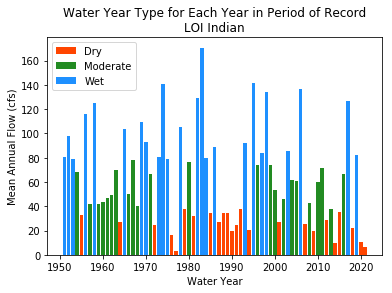

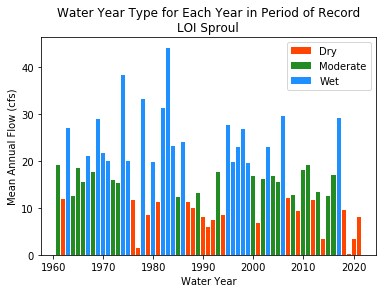

In [31]:
# Original filename: "01_get_wyt_paradigm_por.py"
#calculate WYTs and plot (if selected)


make_plot = 1
sublois, loitab, loi = get_all_sfe_lois()
for l in loitab:
    unimp = read_loi_paradigm_flow(l)
    maflow = unimp.groupby('Water Year').mean()
    maflow['WYT'] = ''
    maflow = maflow[['flow','WYT']]
    dyth = maflow['flow'].quantile(0.33) #dry years are < 33rd percentile
    wtth = maflow['flow'].quantile(0.66) #wet years are > 66th percentile
    maflow.loc[maflow[maflow['flow'] < dyth].index, 'WYT'] = 'Dry'
    maflow.loc[maflow[(maflow['flow'] >= dyth) & (maflow['flow'] < wtth)].index, 'WYT'] = 'Moderate'
    maflow.loc[maflow[maflow['flow'] >= wtth].index, 'WYT'] = 'Wet'
    # maflow.index = maflow.index.strftime('%Y')
    maflow.to_csv(os.path.join(wytdir, 'LOI ' + l + ' WYT.csv'), encoding='utf-8', index=True)

    if make_plot == 1: #makes a bar plot of each Water Year and it's mean annual flow
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        wyts = ['Dry','Moderate','Wet']
        cmap = ['orangered','forestgreen','dodgerblue']
        for w in range(len(wyts)):
            wyt = wyts[w]
            mafwyt = maflow.loc[maflow['WYT'] == wyt,:]
            plt.bar(x=mafwyt.index,height=mafwyt['flow'],color=cmap[w])

        ax.set_xlabel('Water Year')
        ax.set_ylabel('Mean Annual Flow (cfs)')
        ax.set_title('Water Year Type for Each Year in Period of Record\nLOI '+l)
        plt.legend(wyts)
        plt.savefig(os.path.join(wytdir,'Plots','LOI ' + l + ' WYT.png'))
        plt.show()

In [30]:
# Original filename "01_get_wmt_paradigm_por.py"
#calculate WMTs at each location


sublois, loi, sfelois = get_all_sfe_lois()

for l in loi:
    unimp = read_loi_paradigm_flow(l)
    mmflow = unimp.resample('1M').mean() #calculate resampled unimpaired mean monthly flows
    mmflow['Month'] = mmflow.index.month
    mmflow['Year'] = mmflow.index.year
    mmflow = mmflow[['Month','Year','flow']]
    mmflow['WMT'] = ''
    for m in range(1,13): #loop through each calendar month
        singlemmflow = mmflow[mmflow.index.month == m] #filter to calendar months
        #calculate WMT from percentiles
        edth = singlemmflow['flow'].quantile(0.1)
        dyth = singlemmflow['flow'].quantile(0.3)
        bmth = singlemmflow['flow'].quantile(0.5)
        amth = singlemmflow['flow'].quantile(0.7)
        wtth = singlemmflow['flow'].quantile(0.9)
        mmflow.loc[singlemmflow[singlemmflow['flow'] < edth].index,'WMT'] = 'Critically Dry'
        mmflow.loc[singlemmflow[(singlemmflow['flow'] >= edth) & (singlemmflow['flow'] < dyth)].index,'WMT'] = 'Dry'
        mmflow.loc[singlemmflow[(singlemmflow['flow'] >= dyth) & (singlemmflow['flow'] < bmth)].index,'WMT'] = 'Below Median'
        mmflow.loc[singlemmflow[(singlemmflow['flow'] >= bmth) & (singlemmflow['flow'] < amth)].index,'WMT'] = 'Above Median'
        mmflow.loc[singlemmflow[(singlemmflow['flow'] >= amth) & (singlemmflow['flow'] < wtth)].index,'WMT'] = 'Wet'
        mmflow.loc[singlemmflow[singlemmflow['flow'] >= wtth].index,'WMT'] = 'Extremely Wet'
    mmflow.index = mmflow.index.strftime('%b-%Y')
    mmflow.to_csv(os.path.join(wmtdir, 'LOI ' + l + ' WMT.csv'), encoding='utf-8', index=True)
